# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [850]:
import pandas as pd
import pylab as pl
import numpy as np
from numpy import linalg
import math
from __future__ import division
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [851]:
N = 45 # put your index here

In [852]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

In [853]:
## Задание 1
#%%pycodestyle
from sklearn.base import BaseEstimator, ClusterMixin


class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """

    def __init__(self, n_components=2, tol=0.001, max_iter=100, random_state=13):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.k = n_components
        self.tol = tol
        self.max_iter = max_iter
        self.random_state = random_state

    def _init_centroids(self, X):
        centroids = np.empty((self.k, X.shape[1]))
        centroids[0] = X[np.random.randint(low=0, high=X.shape[0])]
        dist = np.zeros((self.k, X.shape[0]))
        for i in range(1, self.k):
            for j in range(i):
                dist[j] = self._euclidean(X, centroids[j])
            min_dist = np.min(dist[:i, :], axis=0)
            sum_ = min_dist.sum()
            centr_sum = np.random.uniform(0, sum_)
            sums = np.cumsum(min_dist)
            centroids[i] = X[sums > centr_sum][0]
        return centroids    

    def start_values_(self, x):
        d = x.shape[1]
        n = x.shape[0]
        P = np.random.rand(self.k) + self.k
        P /= P.sum()
        meanx = x.sum(axis=0) / n
        M = self._init_centroids(x)
        E = [
                  np.diag(np.ones(d))
                  for _ in range(self.k)
        ]
        return P, M, E

    def normal_distr_(self, x, M, C):
        U = [
            np.array(x - M[i])
            for i in range(self.k)
        ]
        A1 = (1 / ((2 * math.pi) ** (self.d / 2))) * \
                (1 / ((linalg.det(C)) ** (1 / 2)))
        Ot = np.empty((self.k, self.x_len))
        for i in range(self.k):
            hmm = np.dot(U[i], linalg.inv(C[i]))
            Ot[i] = np.exp((-1 / 2) * ((hmm) * U[i]).sum(axis=1))
        return Ot * A1.reshape(-1, 1)

    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.d = x.shape[1]
        weights, means, covariances = self.start_values_(x)
        self.x_len = len(x)
        prev_maxlike = 0

        for i in range(self.max_iter):
            gamma = np.empty([self.x_len, self.k])
            normal_distr = self.normal_distr_(x, means, covariances)
            normal_distr = normal_distr.T
            now_maxlike = np.log((weights * normal_distr).sum(axis=1)).sum()
            if(abs(prev_maxlike - now_maxlike) < self.tol):
                return self
            prev_maxlike = now_maxlike
            gamma = weights * normal_distr / \
            ((weights * normal_distr).sum(axis=1)).reshape(self.x_len, -1)
            N = gamma.sum(axis=0)
            nd = gamma / N
            for t in range(self.k):
                td = np.zeros([self.d, self.d])
                for j in range(self.x_len):
                    U = (x[j] - means[t]).reshape(-1, 1)
                    td += nd[j][t] * np.dot(U, U.T)
                if np.linalg.matrix_rank(td) == self.d:
                    covariances[t] = td
            means = np.dot(nd.T,x)
            weights = N / self.x_len
            self.gamma_ = gamma
            self.weights_ = weights
            self.covariances_ = covariances
            self.means_ = means
        return self
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        
        return np.argmax(self.gamma_, axis = 1)
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)
    
    @staticmethod
    def _euclidean(X, centroid):
        tmp = X - centroid
        return (tmp * tmp).sum(axis=1)

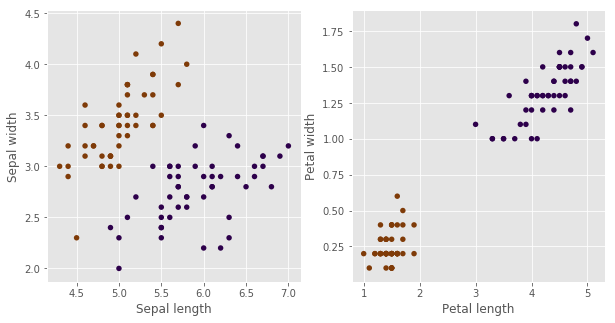

In [854]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

In [855]:
clf = Clustering(n_components = 2)
clf.fit(x_iris)


Clustering(max_iter=100, n_components=None, random_state=13, tol=0.001)

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [856]:
pred_iris = Clustering().fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


In [857]:
%%timeit
clf.fit(x_iris)
pred_ir  = clf.predict(x_iris)

100 loops, best of 3: 7.16 ms per loop


In [858]:
from sklearn.mixture import GaussianMixture
clf_et = GaussianMixture(n_components=2)

In [859]:
%%timeit
clf_et.fit(x_iris)
pred_iris_ = clf_et.predict(x_iris)

100 loops, best of 3: 2 ms per loop


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [860]:
# %%pycodestyle
# Задание 2
# sihouette


def quality(x, y):
    """
    Implement quality criterion of your choice
    """
    n_clust = np.bincount(y).size

    assert n_clust != 1, 'Invalid cluster numb'

    res = 0
    for i in range(x.shape[0]):
        tmp = x - x[i]
        tmp = (tmp * tmp).sum(axis=1)
        a = tmp[y == y[i]].mean()

        b = np.finfo(np.float64).max
        for j in range(n_clust):
            if j != y[i] and np.any(y == j):
                b = min(b, tmp[y == j].mean())
        res += (b - a) / max(a, b)
    res /= x.shape[0]
    return res

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

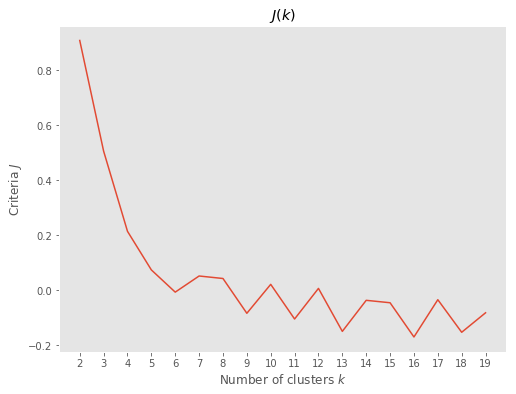

In [861]:
ks = range(2, 20)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(n_components=k)
    cls.fit(x_iris)
    pred = cls.predict(x_iris)
    criteria[i] = quality(x_iris, pred)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.xticks(ks)
pl.grid()
pl.show()

In [862]:
## Задание 3
df = pd.read_csv('./WDI_csv/WDIData.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN,NaN


In [863]:
year = '2015'

In [864]:
df_ = df.loc[:, ['Country Name', 'Indicator Name', year]]
df_ = df_.pivot(index='Country Name', columns='Indicator Name', values=year)
df_.head()

Indicator Name,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",...,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,61.5,30.10,71.500000,64.200000,92.500000,NaN,NaN,NaN,...,32.6,80.2,59.2,18.2,66.9,48.4,33.4,8.8,34.8,28.559831
Albania,NaN,NaN,NaN,75.37,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.815050
Algeria,NaN,NaN,NaN,92.70,99.336708,98.687683,99.605331,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.012976
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,100.00,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [865]:
df_ = df_.iloc[:, np.array(df_.count() >= 262)]
df_.head()

Indicator Name,Land area (sq. km),Population growth (annual %),"Population, total",Surface area (sq. km)
Country Name,,,,
Afghanistan,652860.0,2.943234,33736494.0,652860.0
Albania,27400.0,-0.291206,2880703.0,28750.0
Algeria,2381740.0,1.919959,39871528.0,2381740.0
American Samoa,200.0,0.180222,55537.0,200.0
Andorra,470.0,-1.537836,78014.0,470.0


In [866]:
df_ = df_.fillna(df_.mean())
df_ = df_.dropna(axis=1, how='all')
del df_['Surface area (sq. km)']
del df_['Population, total']
df_.head()

Indicator Name,Land area (sq. km),Population growth (annual %)
Country Name,,
Afghanistan,652860.0,2.943234
Albania,27400.0,-0.291206
Algeria,2381740.0,1.919959
American Samoa,200.0,0.180222
Andorra,470.0,-1.537836


In [867]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df_)
x.shape

(264L, 2L)

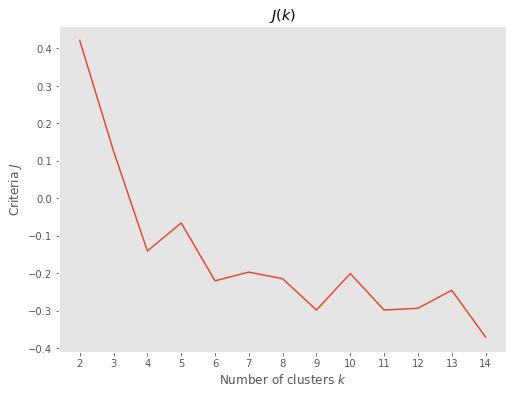

In [868]:
ks = range(2, 15)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(n_components=k)
    cls.fit(x)
    pred = cls.predict(x)
    criteria[i] = quality(x, pred)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.xticks(ks)
pl.grid()
pl.show()

In [869]:
clf = Clustering(n_components=2)
y = clf.fit_predict(x)

In [870]:
np.unique(y, return_counts=True)
countries = list(df_.index)

In [871]:
from sklearn.manifold import TSNE

In [872]:
x_tsne = TSNE(n_components=2).fit_transform(x)

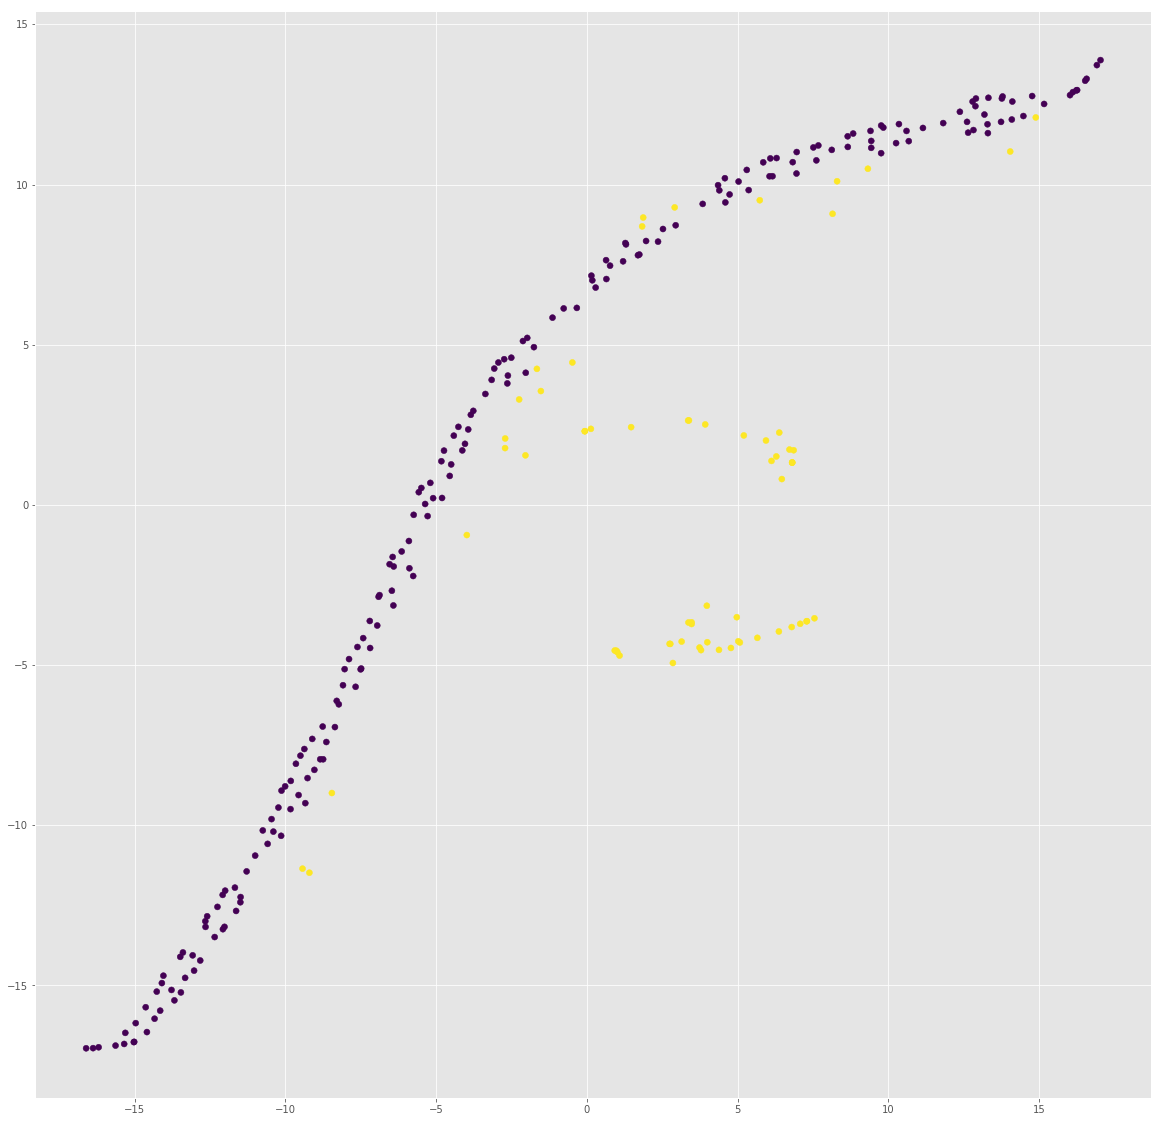

In [873]:
pl.figure(figsize=(20, 20))
pl.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)

pl.show()

In [874]:
np.array(countries)[y == 0]

array(['Afghanistan', 'Albania', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Armenia', 'Aruba', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Caribbean small states',
       'Cayman Islands', 'Central African Republic',
       'Central Europe and the Baltics', 'Chad', 'Channel Islands',
       'Chile', 'Colombia', 'Comoros', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Fiji', 'Finland', 'France', '

In [875]:
np.array(countries)[y == 1]

array(['Algeria', 'Arab World', 'Argentina', 'Australia', 'Brazil',
       'Canada', 'China', 'Congo, Dem. Rep.', 'Early-demographic dividend',
       'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (IDA & IBRD countries)',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'India', 'Indonesia', 'Iran, Islamic Rep.',
       'Kazakhstan', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification', 'Libya',
       'Low & middle income', 'Low 

In [814]:
## Задание 4


Используемые параметры: 'Land area (sq. km)', 'Population growth (annual %)'
Так как рассматривалась зависимость Площади и роста населения логично предположить, что зависимость линейная, что для большинства стран является правдой. Но выделяется также еще один кластер, в котором скорость роста населения заметно выше. Связанно это скорее всего с какими-либо благоприятными условиями.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.